In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt

In [16]:
# Load the data into a pandas dataframe
data = pd.read_csv('final_test_classification_data.csv')

In [17]:
# Split the data into training, testing, and validation sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

In [18]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data.drop('target', axis=1))
y_train = train_data['target']
X_test = scaler.transform(test_data.drop('target', axis=1))
y_test = test_data['target']
X_val = scaler.transform(val_data.drop('target', axis=1))
y_val = val_data['target']

In [19]:
# Reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

In [20]:
# Train different classification models
models = {
    'KNN': KNeighborsClassifier(),
    'Linear SVM': LinearSVC(),
    'RBF SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'QDA': QuadraticDiscriminantAnalysis()
}
best_acc = 0
best_model = ''
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    acc = model.score(X_val_pca, y_val)
    if acc > best_acc:
        best_acc = acc
        best_model = name# Train different classification models
models = {
    'KNN': KNeighborsClassifier(),
    'Linear SVM': LinearSVC(),
    'RBF SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'QDA': QuadraticDiscriminantAnalysis()
}
best_acc = 0
best_model = ''
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    acc = model.score(X_val_pca, y_val)
    if acc > best_acc:
        best_acc = acc
        best_model = name

In [21]:
# Evaluate the best model on the testing data
model = models[best_model]
model.fit(X_train_pca, y_train)
test_acc = model.score(X_test_pca, y_test)
val_acc = best_acc

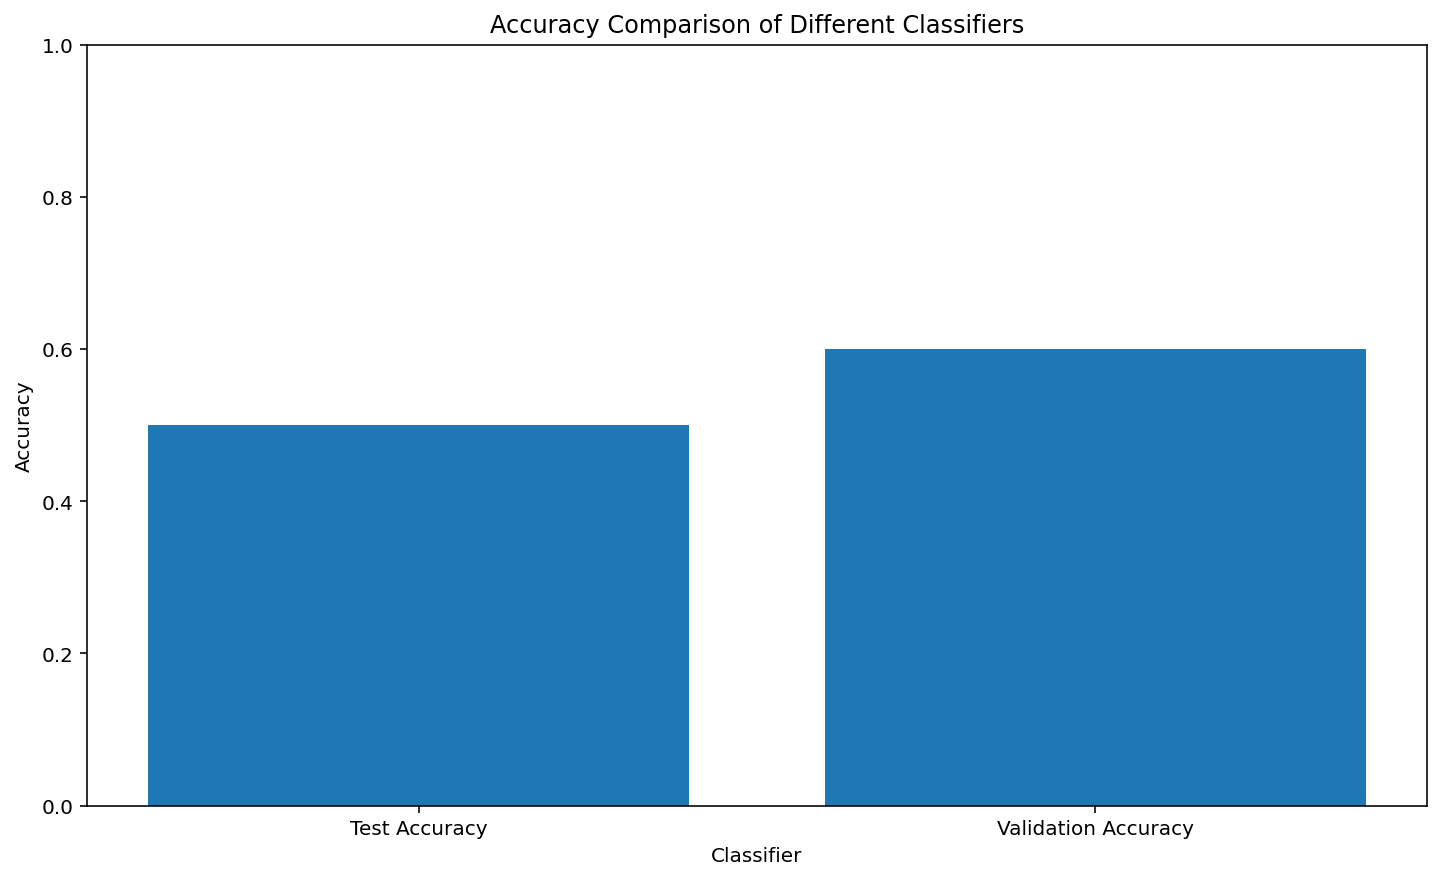

In [22]:
# Create a bar plot with the comparison of different classifiers according to their best accuracy
plt.bar(['Test Accuracy', 'Validation Accuracy'], [test_acc, val_acc])
plt.title('Accuracy Comparison of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()
